## DTMF Project Part 1: Working with Audio Files

In [1]:
# Import libraries here

import numpy as np
import matplotlib.pyplot as plt

### Objective
In this first part of the project you are learning to create audio files in Python that you can store on your computer in form of a wav-file and listen to using a standard audio player. 

### Terminology

**Pure tones:** A pure tone is an audio signal that only consists of a single frequency and has sinusoidal shape. Naming our pure tone $y(t)$, it can be expressed as:

$$ y(t)= A\cdot \cos(2\pi f_0 t+\phi) $$

where $t$ is the independent variable and refers to time. The amplitude $A$ determines the volume of the signal, the frequency $f_0$ the pitch, and $\phi$ (phi) is a phase shift that is not audible and determines the value of $y(t)$ at $t=0$.

The best known example for a pure signal is the sound created by a tuning fork. The standard orchestra pitch tuning fork creates the note A above the middle C, which which has a frequency of $f_0=440$ Hz. Here Hz stands for the unit hertz, which is identical to 1/seconds and measures the number of oscillations per second.

Below the signal $y(t)$ is graphed for a duration of 10 ms. Given that the signal has a frequency of 440 Hz, there are 440 full oscillations (or periods) in a second, or - as can be seen below - 4.4 oscillations in 0.01 s.

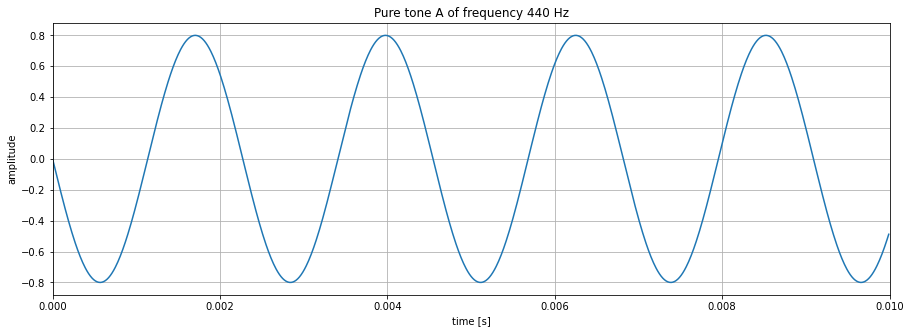

In [2]:
A = 0.8 # amplitude
f0 = 440 # frequency of tone A
phi = np.pi/2 # phase shift

t=np.arange(0,1e-2,1e-5) # time
y=A*np.cos(2*np.pi*f0*t+phi) # signal y(t)

# Create graph
figure1=plt.figure(figsize = (15,5))
plt.plot(t, y)
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.title("Pure tone A of frequency 440 Hz")
plt.grid()
plt.xlim([0,0.01])
plt.show()

**Audible frequencies**: As human beings, we can hear frequencies in the range from roughly 20 Hz to 20,000 Hz, where the exact limits depend on the person and factors such as age and exposure to noise and can be determined in a hearing test. 

**Speech transmission in telephony**: The telephone was designed to transmit frequencies most prominent in speech ranging from approximately 300 Hz to 3400 Hz. Note that music contains higher frequencies and that is why music played across a telephone line is of low quality.


### Storing Audio Files on a Hard Drive / Computer

To store sound in a file on a computer, the sound wave captured by the microphone needs to be converted into a sequence of numbers. This process is called analog-to-digital conversion and consists of two steps:
- **sampling** refers to the discretization of time: every $T_s$ seconds a value of the sound wave is stored; the values in-between are omitted.
- **quantization** refers to the discretization of the amplitude: the amplitude is converted to a format that can be stored with B bits (binary digits, i.e. 1's and 0's).

**Sampling**: Another way of specifying the time discretization is by specifying the so called **sampling rate** $f_s$ denoting the number of values stored per second. Note that $f_s=1/T_s$. Industry standards for sampling frequencies are $f_s=8000$ Hz for speech, $f_s = 44,100$ Hz for audio compact disks, and $f_s = 48,000$ Hz for DVD's.

**Quantization**: This step concern the discretization of amplitude (y-axis). In a fist step, the dynamic range is limited to amplitudes between -1 and 1, i.e. all values outside that range are cut off and set to 1 (or -1 if negative). Next, the range from -1 to 1 is split into $2^B$ levels and each amplitude value is approximated by the closest level and can then be stored using $B$ bits. For speech signals, $B=8$ is chosen, and for high fidelity audio signal $B = 16$ or $B=24$. In a simplified way, quantization can be seen as a type cast from floating point to integer (in8, int16) format.

**Hardware Considerations**: Generally speaking, the cost of an analog-to-digital converter (ADC) increases with both, $f_s$ and $B$. The file size also increases with those two variables, since for every second of a mono audio signal $B\cdot f_s$ bits need to be stored.

The graph below shows the sequence of numbers for our 440 Hz pure tone that are stored in an audio file if the sampling frequency is chosen as $fs=8000$ Hz and the number of bits per value as $B=8$.

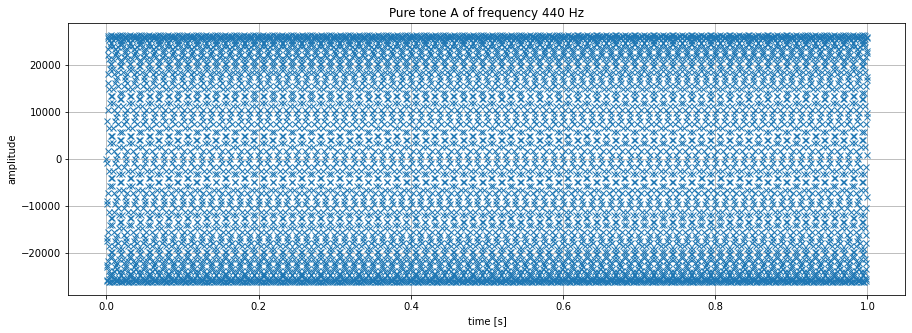

In [3]:
A = 0.8 # amplitude
f0 = 440 # frequency of tone A
phi = np.pi/2 # phase shift

fs=8000;
B=16;

t=np.arange(0,1,1/fs) # discretized time (1 second duration)
y=A*np.cos(2*np.pi*f0*t+phi) # discretized signal y(t)

yq = (2**(B-1))*y 
yq = yq.astype(np.int16) # convert to integer 16-bit format

# Create graph
figure1=plt.figure(figsize = (15,5))
plt.plot(t, yq, marker = 'x', linestyle = '')
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.title("Pure tone A of frequency 440 Hz")
plt.grid()
#plt.xlim([0,0.01])
plt.show()

**Storing the audio signal as a wav-file**: one standardized format to store audio signal is the wav-file. It stores the signal in a binary format and has header information that specifies the sampling rate $f_s$ and the bits per value $B$. If you open a .wav-file in a text editor (e.g. notepad) you will recognize this header information following by a sequence of "junk" characters.

To store our signal as a .wav file, we first need to import this capability from the scipy library. After running the cell below, you will find the file "A440.wav" in your current directory and can play it using a standard audio player.

In [4]:
from scipy.io import wavfile

wavfile.write("A440.wav", fs, y)

**Reading wav-files**: The following cell shows how you can read a .wav-file and store it in a numpy array. Remember, all you are reading in is a sequence of numbers. To recover the correct time information, you also need to read the sampling rate.



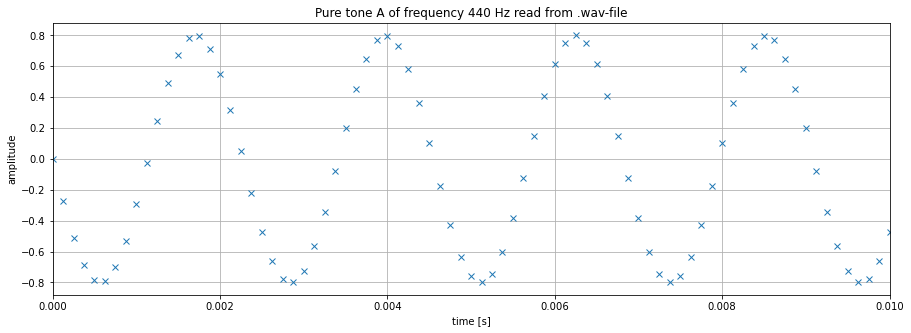

In [5]:
sampling_rate, data = wavfile.read("A440.wav")
data=np.array(data) # convert to numpy array

time = np.arange(0,len(data),1) #create vector of same length as data
time = time/sampling_rate # normalize to represent correct time information
# Create graph
figure1=plt.figure(figsize = (15,5))
plt.plot(time, data, marker = 'x', linestyle = '')
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.title("Pure tone A of frequency 440 Hz read from .wav-file")
plt.grid()
plt.xlim([0,0.01]) # only show 10 ms remove if you want to see the entire signal
plt.show()

### Tasks (15 points)

By performing the following tasks you prepare yourself for working on Dual-Tone Multi-Frequency (DTMF) signals. 

#### Task-1 (3 points)
A piano keyboard covers several octaves. Research the frequencies that correspond to the different octaves of the note "C", specifically the middle C (C4), the tenor C (C3, one octave below the middle C), and the treble C (C5, one octave above the middle C). Reference your source.

In [6]:
# frequencies of C

freq_C3 = 130.8128
freq_C4 = 261.6256
freq_C5 = 523.2511

Reference: **YOUR ANSWER GOES HERE**

https://www.intmath.com/trigonometric-graphs/music.php

https://en.wikipedia.org/wiki/Piano_key_frequencies

#### Task-2  (5 points): 
Assuming a sampling rate of $fs=8000$ Hz, and amplitude of $A=0.5$ and an amplitude quanitzation with $B=16$ bits, create the a graph that shows 10 ms of all three signals. How do they relate to each other?

Note-1: this task includes several steps, define a time vector, create the pure tone signals, quantize the amplitudes, then graph the signals.

Note-2: the phase shift $\phi$ is not specified, so you may choose them as you please.

In [7]:
#Graph of freq_C3
def freq_plotter(fs, A, B, phi, freq): #fs is the sampling rate, A is the amplitude, B is the bit rate, phi is the phase shift, and freq is the frequency of the tone in hz
    t = np.arange(0, 1, 1/fs)
    y = A *(np.cos(2*np.pi*freq*t + phi)) #Using the sinusoidal shape equation from the beginning of the jypter notebook
    yq = (2**(B-1))*y #quantizing the amplitude
    yq = yq.astype(np.int16) #converting to a 16 bit integer
    plt.plot(t, yq, marker = 'x')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Amplitude as a function of Time')
    plt.grid()
    plt.xlim([0, 0.01]) #To only show 10MS
    return(y)

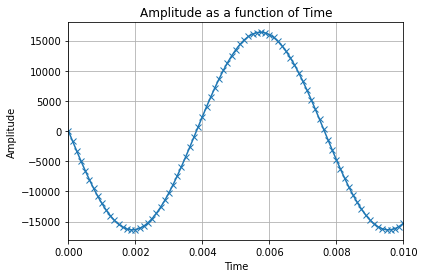

In [8]:
freq_C3_plot = freq_plotter(8000, .5, 16, np.pi/2, freq_C3)

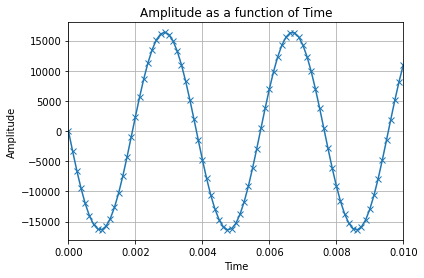

In [9]:
freq_C4_plot = freq_plotter(8000, .5, 16, np.pi/2, freq_C4)

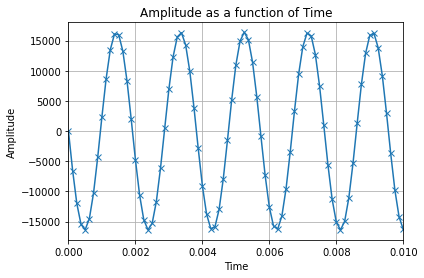

In [10]:
freq_C5_plot = freq_plotter(8000, .5, 16, np.pi/2, freq_C5)

The following relationship between the signals can be observed from the graph above: **YOUR ANSWER GOES HERE**

The relationship is that since the frequency doubles as you go up one C (C3-C4 and C4-C5), the amount of repetitions you see in the graph per 10milliseconds doubles as you go up one C (C3-C4 and C4-C5)

#### Task-3 (3 points): 
Create a wav-file for each tone with a duration of 1 second. Listen to your .wav-files to and compare the sound you created to note C sounds you find on the Internet to ensure that you performed this step correctly. 

In [11]:
C3 = wavfile.write('C131.wav', 8000, freq_C3_plot)
C4 = wavfile.write('C262.wav', 8000, freq_C4_plot)
C5 = wavfile.write('C523.wav', 8000, freq_C5_plot)

#### Task-4 (4 points): 
Read the file `my_tone.wav` and graph the first 10 ms of it. From your graph determine the frequency of the tone (the sound you hear, not the sampling rate). By listening to the sound and comparing it to your note C tones for which you know the frequencies, you can determine the range of frequencies in which it lies.

In [12]:
sampling_rate, my_tone = wavfile.read('my_tone.wav')
my_tone = np.array(my_tone)
test_freq = .8 * (np.cos(2*np.pi*300*t +np.pi/2))

In [13]:
wavfile.write('TestFreq.wav', 8000, test_freq)

(0.0, 0.01)

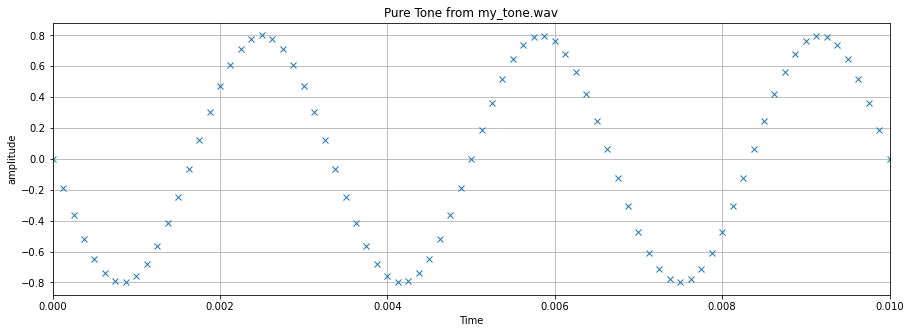

In [14]:
t = np.arange(0, len(my_tone), 1)
t = t/sampling_rate
figure1 = plt.figure(figsize = (15, 5))
plt.plot(t, my_tone, marker = 'x', linestyle = '')
plt.grid()
plt.xlabel('Time')
plt.ylabel('amplitude')
plt.title('Pure Tone from my_tone.wav')
plt.xlim([0, 0.01])

(0.0, 0.01)

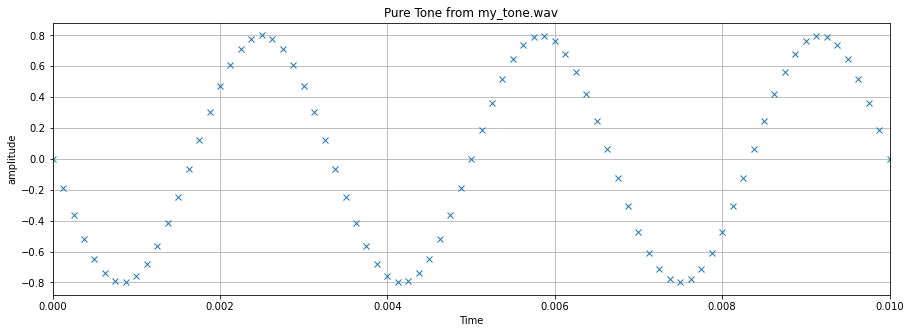

In [15]:
t = np.arange(0, len(my_tone), 1)
t = t/sampling_rate
figure1 = plt.figure(figsize = (15, 5))
plt.plot(t, test_freq, marker = 'x', linestyle = '')
plt.grid()
plt.xlabel('Time')
plt.ylabel('amplitude')
plt.title('Pure Tone from my_tone.wav')
plt.xlim([0, 0.01])

This is how we verified that the frequency we determined makes sense: **YOUR ANSWER GOES HERE**

We found the frequency by realizing that the oscillations per 10 milliseconds was 3; we found this out just by looking at the graph. Then by dividing the 3 by 0.01 to get the frequency per second we got a frequency of 300hz. Graphing the sinusoidal equation with a frequency of 300hz as y, we get a graph that looks exactly like the one from my_tone.wav. So we can conclude that the frequency of my_tone.wav is 300hz. Also, by listening to the files, we determined that the files sounded the same.